![Pirate](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-b9ecaab808c8021fe133006037b4c435_l3.svg)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Elastic Net Regression 
  
class ElasticRegression() : 
      
    def __init__( self, learning_rate, iterations, l1_penality, l2_penality ) : 
          
        self.learning_rate = learning_rate 
        self.iterations = iterations          
        self.l1_penality = l1_penality          
        self.l2_penality = l2_penality 
          
    # Function for model training           
    def fit( self, X, Y ) : 
          
        # no_of_training_examples, no_of_features 
        self.m, self.n = X.shape 
        # weight initialization          
        self.W = np.zeros( self.n )          
        self.b = 0         
        self.X = X          
        self.Y = Y 
          
        # gradient descent learning               
        for i in range( self.iterations ) :              
            self.update_weights()              
        return self
      
    # Helper function to update weights in gradient descent    
    def update_weights( self ) : 
             
        Y_pred = self.predict( self.X ) 
          
        # calculate gradients            
        dW = np.zeros( self.n )          
        for j in range( self.n ) :              
            if self.W[j] > 0 :                  
                dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) ) + 
                         self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m          
            else :                  
                dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) )  
                        - self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m 
        
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
          
        # update weights      
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db          
        return self
      
    # Hypothetical function  h( x )       
    def predict( self, X ) :      
        return X.dot( self.W ) + self.b 

In [4]:
df = pd.read_csv("../assets/salary_data.csv")   
X = df.iloc[:,:-1].values  
Y = df.iloc[:,1].values 

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/3, random_state = 0 )

In [8]:
model = ElasticRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 500, l2_penality = 1 )  
model.fit( X_train, Y_train ) 

In [9]:
Y_pred = model.predict( X_test ) 

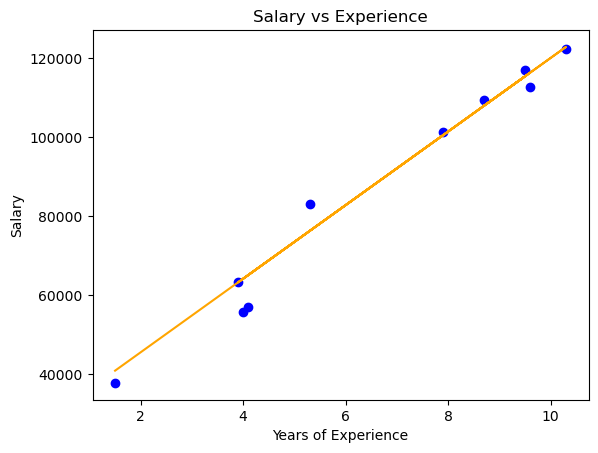

In [10]:
plt.scatter( X_test, Y_test, color = 'blue' )      
plt.plot( X_test, Y_pred, color = 'orange' )      
plt.title( 'Salary vs Experience' )      
plt.xlabel( 'Years of Experience' )       
plt.ylabel( 'Salary' )      
plt.show() 